## Answer

In [26]:
def min_triangulation_cost(vertices):
    """
    Calculate the minimum triangulation cost for a convex polygon.
    
    :param vertices: List of tuples, each tuple is a point (x, y) representing a vertex of the polygon.
    :return: Minimum cost of triangulating the polygon.
    """
    
    def distance(p1, p2):
        """Calculate the distance between two points."""
        return ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    
    def perimeter(i, j, k):
        """Calculate the perimeter of the triangle formed by vertices i, j, and k."""
        return distance(vertices[i], vertices[j]) + distance(vertices[j], vertices[k]) + distance(vertices[k], vertices[i])

    n = len(vertices)
    
    # Initialize dp table
    dp = [[0] * n for _ in range(n)]
    # Table to track the chosen diagonals
    chosen = [[None] * n for _ in range(n)]
    # Fill the dp table
    for gap in range(2, n):
        for i in range(n - gap):
            j = i + gap
            dp[i][j] = float('inf')
            for k in range(i + 1, j):
                cost = dp[i][k] + dp[k][j] + perimeter(i, j, k)
                dp[i][j] = min(dp[i][j], cost)
                # Track the chosen diagonal
                if dp[i][j] == cost:
                    chosen[i][j] = k
                
    return dp[0][n-1], chosen


### Read INPUT

In [27]:
def read_vertices_from_file(filename):
    """
    Read the vertices from the given file.
    
    :param filename: Name of the file to read from.
    :return: List of tuples, each tuple is a vertex (x, y).
    """
    with open(filename, 'r') as file:
        n = int(file.readline().strip())  # Read the number of vertices as an integer
        vertices = []
        for _ in range(n):
            # Read coordinates as floats
            x, y = map(float, file.readline().strip().split())
            vertices.append((x, y))
    return vertices

### Arrange vertices in order

In [28]:
import math
def sort_vertices_counterclockwise(vertices):
    """
    Sort the given list of vertices in counterclockwise order.
    
    :param vertices: List of tuples, each tuple is a point (x, y).
    :return: List of tuples sorted in counterclockwise order.
    """
    # Find the centroid of the vertices
    cx = sum(x for x, y in vertices) / len(vertices)
    cy = sum(y for x, y in vertices) / len(vertices)
    
    # Sort based on the atan2 of the angle to the centroid
    vertices.sort(key=lambda point: math.atan2(point[1] - cy, point[0] - cx))
    
    return vertices


### Draw graph section

In [29]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_polygon(vertices):
    """
    Draw the given vertices as a convex polygon.
    
    :param vertices: List of tuples, each tuple is a point (x, y).
    """
    # Create a graph
    G = nx.Graph()
    
    # Add vertices to the graph
    for vertex in vertices:
        G.add_node(vertex)
        
    # Connect each vertex to the next to form the polygon
    for i in range(len(vertices)):
        G.add_edge(vertices[i], vertices[(i+1)%len(vertices)])
        
    # Draw the graph
    pos = {vertex: vertex for vertex in vertices}
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue')
    plt.show()
    
def extract_diagonals(chosen, i, j):
    if i + 1 >= j:
        return []
    k = chosen[i][j]
    return [(i, k), (k, j)] + extract_diagonals(chosen, i, k) + extract_diagonals(chosen, k, j)

def draw_polygon_with_diagonals(vertices, diagonals):
    G = nx.Graph()
    
    # Add vertices to the graph
    for vertex in vertices:
        G.add_node(vertex)
        
    # Connect each vertex to the next to form the polygon
    for i in range(len(vertices)):
        G.add_edge(vertices[i], vertices[(i+1)%len(vertices)])
    
    # Add the diagonals
    for diagonal in diagonals:
        G.add_edge(vertices[diagonal[0]], vertices[diagonal[1]])
        
    pos = {vertex: vertex for vertex in vertices}
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_weight='bold', width=2, edge_color='black')
    plt.show()


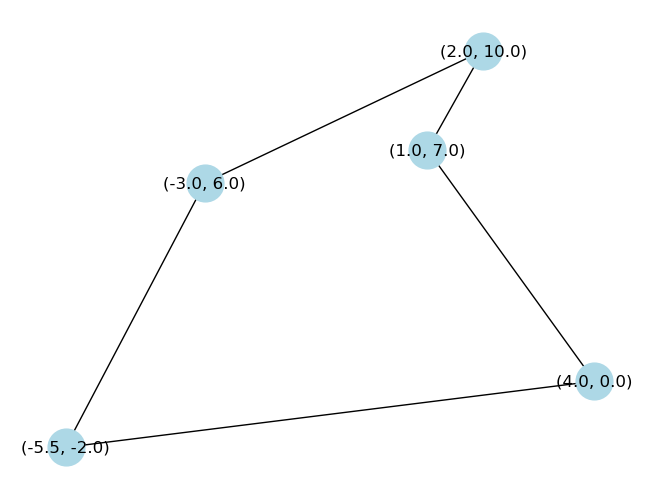

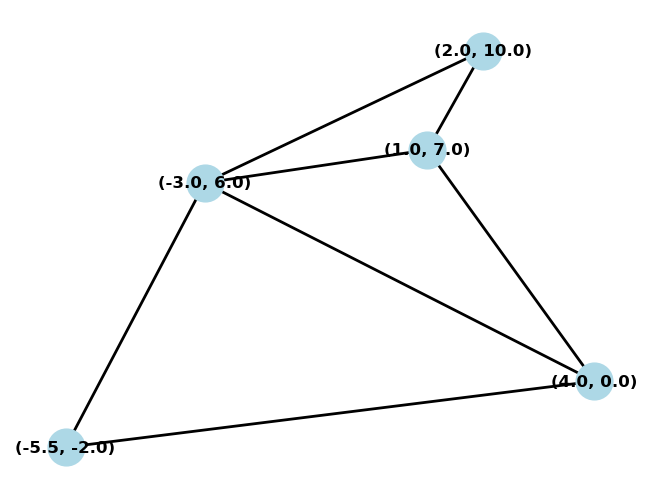

Anwer: 61.95624639588014


In [30]:
# Read and sort vertices
vertices = read_vertices_from_file('Example_LAB5.txt')
sorted_vertices = sort_vertices_counterclockwise(vertices)

# Calculate and print the minimum triangulation cost
answer, chosen = min_triangulation_cost(sorted_vertices)
diagonals = extract_diagonals(chosen, 0, len(sorted_vertices)-1)

# Draw the polygon
draw_polygon(sorted_vertices)
draw_polygon_with_diagonals(sorted_vertices, diagonals)
print(f"Anwer: {answer}")

